In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
diabetesData = pd.read_csv('diabetes.csv')

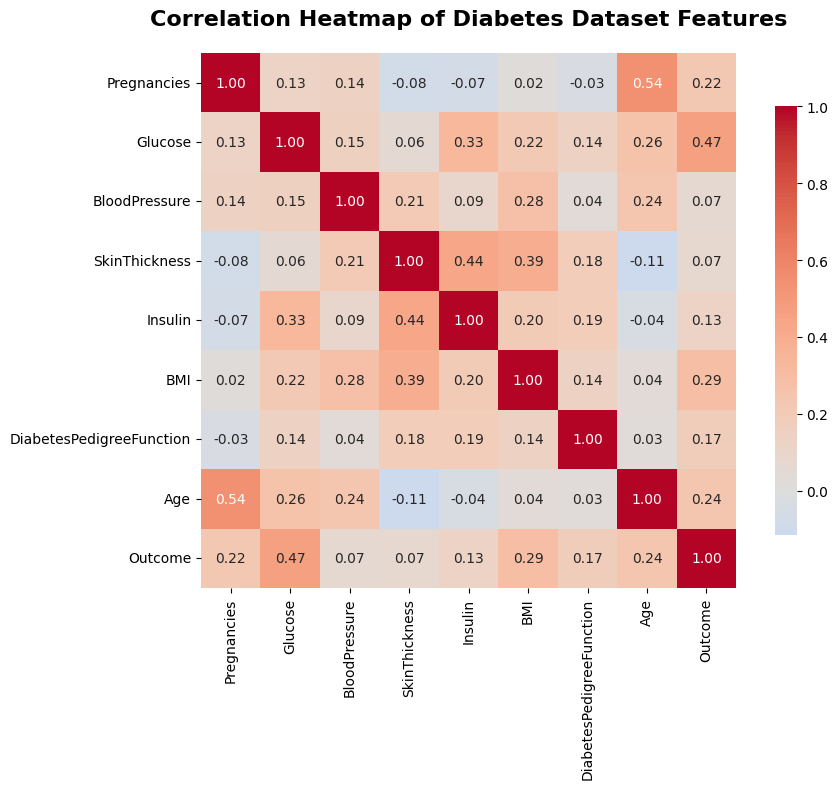

In [4]:
# Calculate correlation matrix
correlation_matrix = diabetesData.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           
            cmap='coolwarm',     
            center=0,            
            square=True,        
            fmt='.2f',           
            cbar_kws={'shrink': 0.8})  

plt.title('Correlation Heatmap of Diabetes Dataset Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

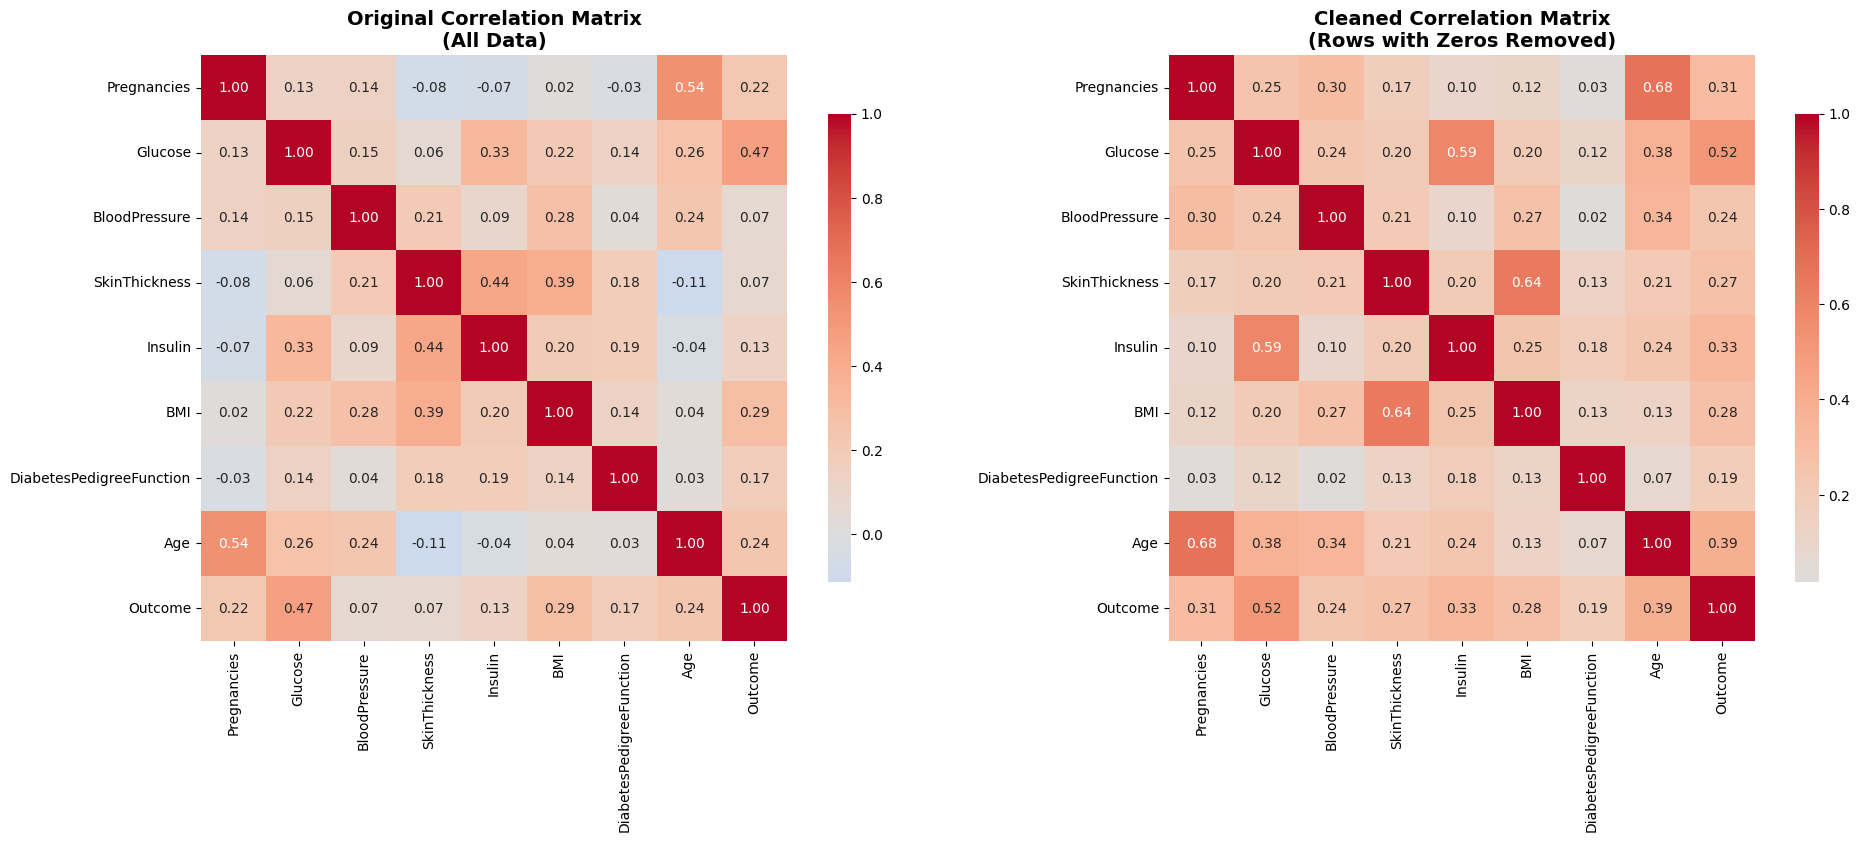

In [6]:
# Remove all rows that contain any zero values
print(diabetesData.describe())

# Check which columns have zeros
for col in diabetesData.columns:
    zero_count = (diabetesData[col] == 0).sum()
    zero_percentage = (zero_count / len(diabetesData)) * 100
    if zero_count > 0:
        print(f"{col}: {zero_count} zeros ({zero_percentage:.1f}%)")

# Remove rows with any zero values (excluding Outcome column since 0 is valid)
feature_columns = [col for col in diabetesData.columns if col != 'Outcome']
diabetesData_no_zeros = diabetesData[(diabetesData[feature_columns] != 0).all(axis=1)]


# Calculate correlation matrix for cleaned data
correlation_matrix_clean = diabetesData_no_zeros.corr()

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Original correlation matrix
sns.heatmap(correlation_matrix, 
            annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f',
            cbar_kws={'shrink': 0.8}, ax=ax1)
ax1.set_title('Original Correlation Matrix\n(All Data)', fontsize=14, fontweight='bold')

# Cleaned correlation matrix
sns.heatmap(correlation_matrix_clean, 
            annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f',
            cbar_kws={'shrink': 0.8}, ax=ax2)
ax2.set_title('Cleaned Correlation Matrix\n(Rows with Zeros Removed)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

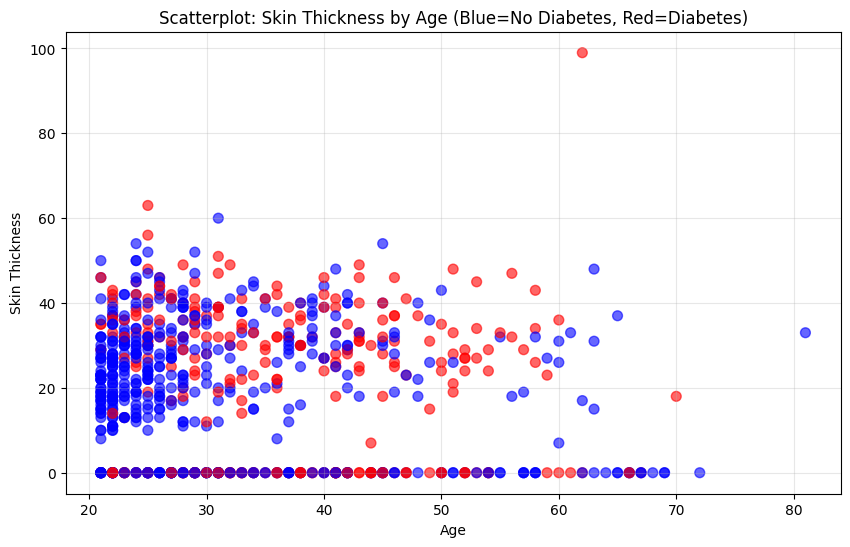

In [9]:
plt.figure(figsize=(10, 6))
colors = ['blue' if outcome == 0 else 'red' for outcome in diabetesData['Outcome']]
plt.scatter(diabetesData['Age'], diabetesData['SkinThickness'], 
           c=colors, alpha=0.6, s=50)
plt.xlabel('Age')
plt.ylabel('Skin Thickness')
plt.title('Scatterplot: Skin Thickness by Age (Blue=No Diabetes, Red=Diabetes)')
plt.grid(True, alpha=0.3)
plt.show()

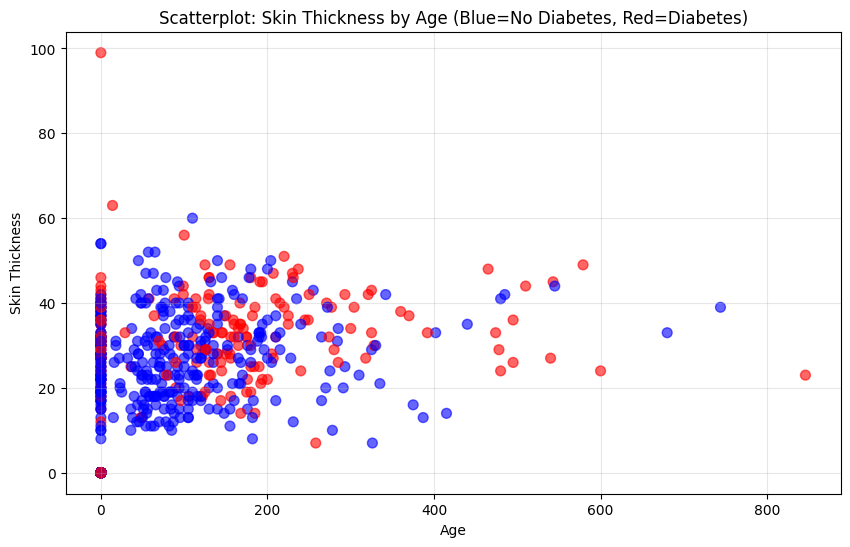

In [10]:
plt.figure(figsize=(10, 6))
colors = ['blue' if outcome == 0 else 'red' for outcome in diabetesData['Outcome']]
plt.scatter(diabetesData['Insulin'], diabetesData['SkinThickness'], 
           c=colors, alpha=0.6, s=50)
plt.xlabel('Age')
plt.ylabel('Skin Thickness')
plt.title('Scatterplot: Skin Thickness by Age (Blue=No Diabetes, Red=Diabetes)')
plt.grid(True, alpha=0.3)
plt.show()

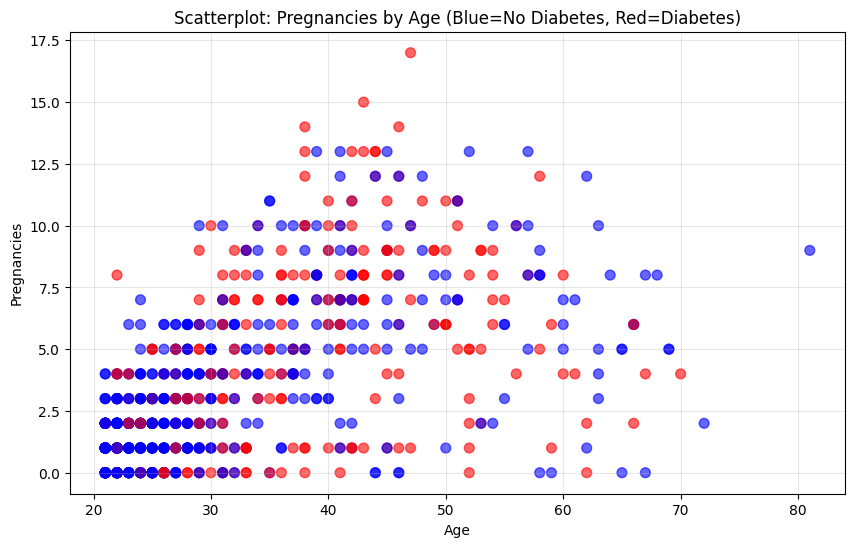

In [11]:
plt.figure(figsize=(10, 6))
colors = ['blue' if outcome == 0 else 'red' for outcome in diabetesData['Outcome']]
plt.scatter(diabetesData['Age'], diabetesData['Pregnancies'], 
           c=colors, alpha=0.6, s=50)
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('Scatterplot: Pregnancies by Age (Blue=No Diabetes, Red=Diabetes)')
plt.grid(True, alpha=0.3)
plt.show()